In [26]:
# This file examines the accepted_2017_reduced.csv created in reduce_data.ipynb
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# eliminate the truncation of output in pandas dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [28]:
# Load the reduced dataset
df = pd.read_csv("../data/accepted_2017_reduced.csv")   # adjust if needed
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,120113784,35000.0,35000.0,35000.0,60 months,12.62,789.57,C,C1,Supervisor,10+ years,MORTGAGE,85000.0,Source Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120113784,house,Home buying,112xx,NY,12.14,0.0,Apr-1998,680.0,684.0,0.0,61.0,7.0,1.0,6029.0,30.6,17.0,w,0.0,0.0,39723.460669,39723.46,35000.0,4723.46,0.0,0.0,0.0,Dec-2018,29508.13,Dec-2018,699.0,695.0,0.0,1.0,Individual,0.0,0.0,21567.0,1.0,2.0,2.0,3.0,4.0,15538.0,73.0,2.0,3.0,3570.0,53.0,19700.0,0.0,0.0,3.0,6.0,3081.0,12471.0,32.6,0.0,0.0,167.0,233.0,12.0,4.0,2.0,12.0,12.0,0.0,4.0,4.0,4.0,6.0,7.0,5.0,8.0,4.0,7.0,0.0,0.0,0.0,4.0,92.3,25.0,1.0,0.0,40953.0,21567.0,18500.0,21253.0,N,Cash,N
1,120037097,10000.0,10000.0,10000.0,36 months,15.05,346.90,C,C4,Teller,1 year,RENT,10000.0,Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120037097,debt_consolidation,Debt consolidation,412xx,KY,49.94,0.0,Apr-1997,705.0,709.0,3.0,NaN,13.0,0.0,16253.0,24.7,16.0,w,0.0,0.0,10682.292600,10682.29,10000.0,682.29,0.0,0.0,0.0,Mar-2018,9311.41,Mar-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,16253.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,4.0,8.0,6581.0,25.0,65700.0,0.0,0.0,5.0,8.0,1250.0,44147.0,26.9,0.0,0.0,NaN,245.0,5.0,5.0,0.0,5.0,5.0,0.0,10.0,10.0,11.0,13.0,0.0,13.0,16.0,10.0,13.0,0.0,0.0,0.0,4.0,100.0,9.1,0.0,0.0,65700.0,16253.0,60400.0,0.0,N,Cash,N
2,120122709,10000.0,10000.0,10000.0,60 months,13.59,230.57,C,C2,Legal Assistant,3 years,MORTGAGE,58000.0,Not Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120122709,debt_consolidation,Debt consolidation,080xx,NJ,21.64,0.0,Jan-1984,675.0,679.0,0.0,57.0,15.0,1.0,11464.0,31.9,47.0,w,0.0,0.0,11239.973775,11239.97,10000.0,1239.97,0.0,0.0,0.0,Sep-2018,8949.37,Feb-2019,644.0,640.0,0.0,1.0,Individual,0.0,374.0,146107.0,0.0,2.0,0.0,1.0,16.0,28901.0,87.0,1.0,7.0,6021.0,59.0,35900.0,0.0,0.0,1.0,8.0,10436.0,7485.0,57.0,0.0,0.0,92.0,404.0,12.0,12.0,3.0,24.0,12.0,0.0,3.0,6.0,4.0,17.0,4.0,12.0,40.0,6.0,15.0,0.0,0.0,0.0,1.0,97.4,50.0,1.0,0.0,218992.0,40365.0,17400.0,33092.0,N,Cash,N
3,120087572,1000.0,1000.0,1000.0,36 months,15.05,34.69,C,C4,Senior Community Coordinator,7 years,RENT,43000.0,Verified,2017-09-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120087572,moving,Moving and relocation,482xx,MI,19.29,0.0,Nov-2007,695.0,699.0,0.0,NaN,8.0,0.0,17079.0,43.2,14.0,w,0.0,0.0,379.920000,379.92,259.5,120.42,0.0,0.0,0.0,Sep-2018,34.69,Dec-20

In [36]:
# shape of df
df.shape

(178817, 108)

In [ ]:
# check descriptive stats
df.describe(include='all')

In [35]:
# all features I have and their descriptions
dict_approved = pd.read_csv("../data/data_dictionary_approved.csv")
dict_notes = pd.read_csv("../data/data_dictionary_notes.csv", encoding="ISO-8859-1", header=None)
dict_reject   = pd.read_csv("../data/data_dictionary_reject.csv", encoding="ISO-8859-1", header=None)

#  define columns
for d in (dict_approved, dict_notes, dict_reject):
    d.columns = ["feature", "description"]

# combine dictionaries and merge with features in df
dict_all = pd.concat([dict_approved, dict_notes, dict_reject], ignore_index=True)
dict_all = dict_all.drop_duplicates(subset="feature")
features = pd.DataFrame({"feature": df.columns})

feature_desc_table = features.merge(dict_all, on="feature", how="left")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

feature_desc_table


,feature,description
0,id,A unique LC assigned ID for the loan listing.
1,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
2,funded_amnt,The total amount committed to that loan at that point in time.
3,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
4,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
5,int_rate,Interest Rate on the loan
6,installment,The monthly payment owed by the borrower if the loan originates.
7,grade,LC assigned loan grade
8,sub_grade,LC assigned loan subgrade
9,emp_title,The job title supplied by the Borrower when applying for the loan.*


In [ ]:
#  analyze missing values from features
missing = df.isna().mean() * 100
missing_df = pd.DataFrame(missing, columns=['missing_percent'])

# Sort from greatest to least
missing_df = missing_df.sort_values('missing_percent', ascending=False)

missing_df

In [ ]:
# check target distribution
df['loan_status'].value_counts()

In [5]:
# check target distribution percentages
df['loan_status'].value_counts(normalize=True) * 100

loan_status
Fully Paid            72.785026
Charged Off           21.892773
Late (31-120 days)     4.476084
Late (16-30 days)      0.834373
Default                0.011744
Name: proportion, dtype: float64

/var/folders/c9/4lmf4c5n2q9fnm1238mvpkqc0000gn/T/ipykernel_28319/613479769.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


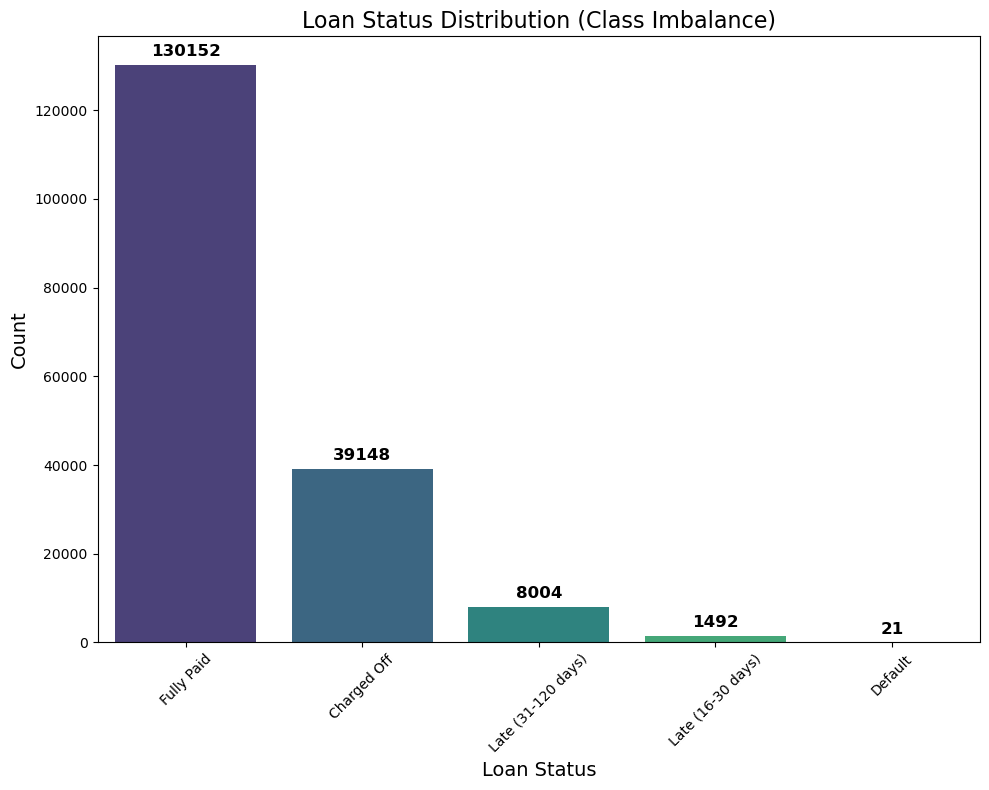

In [17]:
#  plot target distribution

# Count values in the order they appear (descending)
counts = df['loan_status'].value_counts()
order = counts.index

plt.figure(figsize=(10, 8))
ax = sns.countplot(
    data=df,
    x='loan_status',
    order=order,
    palette="viridis"
)

# --- Add data labels ---
for i, count in enumerate(counts):
    ax.text(
        i,                              # x coordinate
        count + (0.01 * max(counts)),   # y coordinate slightly above bar
        str(count),                     # text (count)
        ha='center', va='bottom', 
        fontsize=12, fontweight='bold'
    )

plt.title("Loan Status Distribution (Class Imbalance)", fontsize=16)
plt.xlabel("Loan Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# list of features in the reduced dataset
print(df.columns.tolist())


['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 